In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
%run -i '../../../../../../utils.py'

# Get data

In [2]:
# read meta data
df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_meta = df_meta.drop('Diet', axis=1)
df_meta.head()

,MiceID,Vendor,Day,RandomizedGroup
SampleID,,,,
sample141,BI1,Beijing,0,A
sample142,BI2,Beijing,0,B
sample143,BI3,Beijing,0,D
sample144,BI4,Beijing,0,E
sample145,BI5,Beijing,0,C


In [3]:
# read SCFA data
df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [4]:
# read bacterial abundance
df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_bac.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,108301.701888,7101.750943,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,63028.039623,0.0,0.0,0.0,165115.709436,0.0,0.0,0.0,1.322701e+05
sample132,0.0,405068.034693,50064.588558,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,80103.341692,0.0,0.0,0.0,106501.033841,0.0,0.0,0.0,1.003112e+06
sample133,0.0,36169.603950,45332.570284,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,221840.237562,0.0,0.0,0.0,1.866352e+05
sample134,0.0,484302.054587,10150.043060,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,105850.449056,0.0,0.0,0.0,919303.900024,0.0,0.0,0.0,8.714537e+05
sample135,0.0,91489.970533,42374.302141,0.0,0.0,0.0,0.0,0.0,12519.680178,0.0,...,0.0,0.000000,0.0,0.0,0.0,581683.602124,0.0,0.0,0.0,5.335310e+05


# Run RandomForest

In [8]:
for add_time in [True, False]:
    for group_to_exclude in ['A','B','C','D']:
        df_rf_reg, df_rf_opt_paras, _ = train_scfa_dynamics_model(
            df_meta = df_meta, 
            df_bac = df_bac, 
            df_scfa = df_scfa, 
            target_scfa=['Acetate','Butyrate','Propionate'],
            topN=40,
            normalize_X=True,
            exclude_group=group_to_exclude,
            exclude_vendor=None,
            model='RandomForest',
            addVar=add_time,
            use_deriv=False
        )
        if add_time:
            df_rf_opt_paras.to_csv('optimal_rf_parameters_w_time_exclude_group%s.csv'%(group_to_exclude))
            df_rf_reg.to_csv('rf_regression_w_time_exclude_group%s.csv'%(group_to_exclude))
        else:
            df_rf_opt_paras.to_csv('optimal_rf_parameters_no_time_exclude_group%s.csv'%(group_to_exclude))
            df_rf_reg.to_csv('rf_regression_no_time_exclude_group%s.csv'%(group_to_exclude))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 20.2min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 24.0min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 23.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 22.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.0min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 561.0min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 16.3min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 15.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1410 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1937 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 11.2min finished


# Compare observed and predicted SCFA production

In [12]:
def predict_scfa_deriv(add_time,group_to_exclude):
    df_pred = None

    # get raw data
    df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
    df_meta = df_meta[df_meta.Diet=='Inulin']
    df_meta = df_meta.drop('Diet', axis=1)
    df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
    df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)

    # get trained model
    target_scfa=['Acetate','Butyrate','Propionate']
    if add_time:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_w_time_exclude_group%s.csv'%(group_to_exclude), index_col=0)
    else:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_no_time_exclude_group%s.csv'%(group_to_exclude), index_col=0)

    target_scfa_sliced, df_meta_sliced, df_bac_sliced, df_scfa_sliced, df_scfa_deriv = data_processing_scfa(
        df_meta, df_bac, df_scfa, target_scfa, topN=40, normalize_X=True, exclude_group=group_to_exclude, exclude_vendor=None, use_deriv=False)

    _,_,reg = train_scfa_dynamics_model(
        df_meta=df_meta, # meta data
        df_bac=df_bac,  # relative abundace or absolute abundance of gut microbiome
        df_scfa=df_scfa, # SCFA measurement
        target_scfa=target_scfa, # dependent variable(s) in the regression
        topN=40, # keep only the most abundance N taxa in the model
        normalize_X=True, # normalize maximum of bacterial abundance to 1
        exclude_group=group_to_exclude, # group of mice excluded from model training
        exclude_vendor=None, # group of mice excluded from model training
        model='RandomForest',# regression model
        opt_params = df_opt_paras, # optimal model parameters
        addVar=add_time, # if True, add SCFA time, i.e., dSCFA/dt = f(microbiome, SCFA)
        use_deriv=False  # use scfa derivative as dependent variables
    )

    # predict SCFA derivative
    for scfa_ in target_scfa:
        df_pred_tmp = deepcopy(df_scfa_deriv)
        df_pred_tmp = df_pred_tmp[[x for x in df_pred_tmp.columns if x not in list(set(target_scfa)-set([scfa_]))]]
        df_pred_tmp = df_pred_tmp.rename({scfa_:'SCFA_deriv_observed'}, axis=1)
        df_pred_tmp['SCFA_mol'] = scfa_
        df_pred_tmp['SCFA_value_observed'] = df_scfa_sliced[scfa_]

        if add_time:
            X_var = np.concatenate((np.asarray(df_bac_sliced.values), np.asarray(df_meta_sliced['Day']).reshape(-1,1)), 1)
        else:
            X_var = np.asarray(df_bac_sliced.values)
        df_pred_tmp['SCFA_deriv_predicted'] = reg[scfa_].predict(X_var)

        if df_pred is None:
            df_pred = df_pred_tmp
        else:
            df_pred = pd.concat([df_pred, df_pred_tmp], ignore_index=True)

    return df_pred

In [13]:
for add_time in [True, False]:
    df = None
    for idx_j, group_to_exclude in enumerate(['A','B','C','D']):
        df_tmp = predict_scfa_deriv(add_time=add_time, group_to_exclude=group_to_exclude)
        if idx_j==0:
            df = df_tmp
        else:
            df = pd.concat([df, df_tmp], ignore_index=True)
    df['RelativeError'] = (df['SCFA_deriv_predicted']-df['SCFA_deriv_observed'])/df['SCFA_deriv_observed']*100
    df['RelativeAbsError'] = np.abs(df['RelativeError'])
    if add_time:
        df.to_csv('training_error_intrapolation_w_time.csv')
    else:
        df.to_csv('training_error_intrapolation_no_time.csv')

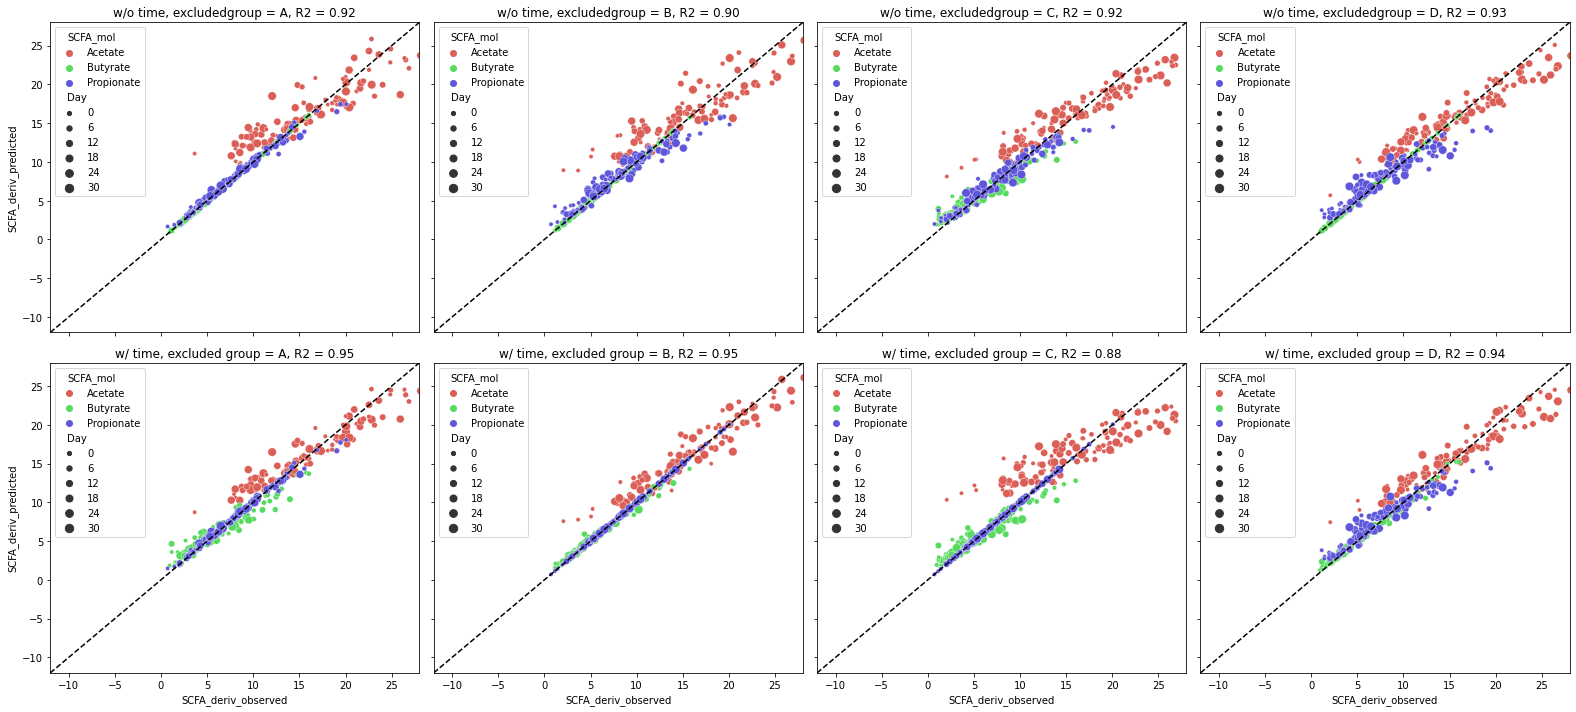

In [15]:
fig, ax = plt.subplots(figsize=(22,10), nrows=2, ncols=4, sharex=True, sharey=True)

for idx_i,add_time in enumerate([False, True]):
    for idx_j, group_to_exclude in enumerate(['A','B','C','D']):
        df_pred = predict_scfa_deriv(add_time=add_time, group_to_exclude=group_to_exclude)
        
        _ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred, ax=ax[idx_i,idx_j])
        _ = ax[idx_i,idx_j].plot([-12,28],[-12,28],'k--')
        _ = ax[idx_i,idx_j].set_xlim([-12,28])
        _ = ax[idx_i,idx_j].set_ylim([-12,28])
        if add_time:
            _ = ax[1,idx_j].set_title('w/ time, excluded group = %s, R2 = %2.2f'%(group_to_exclude,r2_score(df_pred.SCFA_deriv_observed, df_pred.SCFA_deriv_predicted)))
        else:
            _ = ax[0,idx_j].set_title('w/o time, excludedgroup = %s, R2 = %2.2f'%(group_to_exclude,r2_score(df_pred.SCFA_deriv_observed, df_pred.SCFA_deriv_predicted)))
            
plt.tight_layout()